# Multiple Linear Regression

In [23]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy
import pylab as pl
%matplotlib inline

In [5]:
# We will first download the Dataset.
!wget -O FuelConsumption.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv

--2019-10-25 19:09:31--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.193
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘FuelConsumption.csv’

FuelConsumption.csv 100%[===================>]  70.93K  52.2KB/s    in 1.4s    

2019-10-25 19:09:34 (52.2 KB/s) - ‘FuelConsumption.csv’ saved [72629/72629]



In [7]:
# The first thing that we are doing is to read the data in CSV 
df = pd.read_csv('FuelConsumption.csv')
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [9]:
# Taking out the features we wanna use.
arr = ['CYLINDERS','ENGINESIZE','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','FUELCONSUMPTION_COMB_MPG','CO2EMISSIONS']
cdf = df[arr]
cdf.head()

,CYLINDERS,ENGINESIZE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,4,2.0,9.9,6.7,8.5,33,196
1,4,2.4,11.2,7.7,9.6,29,221
2,4,1.5,6.0,5.8,5.9,48,136
3,6,3.5,12.7,9.1,11.1,25,255
4,6,3.5,12.1,8.7,10.6,27,244


[]

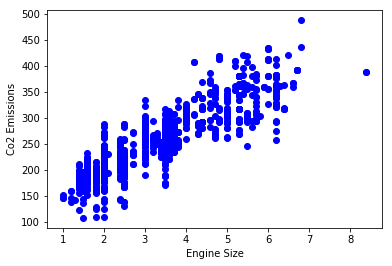

In [20]:
#Simply plotting emission values with respect to engine size.
plt.scatter(cdf.ENGINESIZE,cdf.CO2EMISSIONS,color='blue')
plt.xlabel('Engine Size')
plt.ylabel('Co2 Emissions')
plt.plot()

In [26]:
# Checking as too why apply linear regression

a = scipy.stats.pearsonr(cdf.ENGINESIZE,cdf.CO2EMISSIONS)
b = scipy.stats.pearsonr(cdf.CYLINDERS,cdf.CO2EMISSIONS)
c = scipy.stats.pearsonr(cdf.FUELCONSUMPTION_CITY,cdf.CO2EMISSIONS)
d = scipy.stats.pearsonr(cdf.FUELCONSUMPTION_HWY,cdf.CO2EMISSIONS)
print(a,b,c,d)

#ALl are greater than 0.7, it is fairly fine to apply linear regression.

(0.8741543683958123, 0.0) (0.8496845920141143, 2.7709372039888274e-298) (0.8980385119353926, 0.0) (0.8617479448970434, 3.91865563e-316)


## Splitting the dataset into test and train

In [13]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

## Applying the ML model.

In [16]:
from sklearn import linear_model
regr = linear_model.LinearRegression()

x = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit(x,y)

print("Coefficient: ", regr.coef_)
print("Intercept: ",regr.intercept_)

#Here, the coefficients are given by the linear_model based on Ordinary Least squares.

Coefficient:  [[11.30666457  7.44721069  9.18740442]]
Intercept:  [68.052935]


## Ordinary Least squares.

##### OLS is a method for estimating the unknown parameters in a linear regression model. OLS chooses the parameters of a linear function of a set of explanatory variables by minimizing the sum of the squares of the differences between the target dependent variable and those predicted by the linear function. In other words, it tries to minimizes the sum of squared errors (SSE) or mean squared error (MSE) between the target variable (y) and our predicted output (𝑦̂ ) over all samples in the dat

## Prediction

In [17]:
test_y_hat = regr.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
test_x = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])

print("Residual sum of squares: %.2f" % np.mean((test_y_hat-test_y)**2))


Residual sum of squares: 502.11


# We even get the variance score.

###### Variance regression score.

1. If y(hat) is the predicted output and y is the corresponding correct output and var is the variance, the 
    square of standard deviation. 
2. The explained variance is defined as:
    
    explained variance(y,y(hat)) = 1-(var(y-y(hat))/var(y))
    
    The best possible score is 1.0.

In [18]:
print("Variance score %.2f" % regr.score(x,y))

Variance score 0.86
